In [1]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [14]:
# Load cleaned data exported from Data Cleaning Ipython Notebook

data = pd.read_csv(r'C:\Users\alsherman\Desktop\GitHub\DataScience_GeneralAssembly\Data\Cleaned_Data.csv')

In [15]:
data.describe()

,ID,latitude,location_data_accuracy,longitude,average_image_size,bathroom,bedroom,cat,dog,image_number,...,square_footage,grocery_list,gym_list,movie_theatre_list,train_station_list,airport_list,subway_station_list,Barnes_and_Nobles_list,Deloitte_list,Starbucks_list
count,1,1.000000,1,1.000000,1,1.0,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
mean,5005421838,39.118608,0,-77.211356,270000,2.5,3,0,0,11,...,NaN,0,0,0,0,0,0,0,0,0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,5005421838,39.118608,0,-77.211356,270000,2.5,3,0,0,11,...,NaN,0,0,0,0,0,0,0,0,0
25%,5005421838,39.118608,0,-77.211356,270000,2.5,3,0,0,11,...,NaN,0,0,0,0,0,0,0,0,0
50%,5005421838,39.118608,0,-77.211356,270000,2.5,3,0,0,11,...,NaN,0,0,0,0,0,0,0,0,0
75%,5005421838,39.118608,0,-77.211356,270000,2.5,3,0,0,11,...,NaN,0,0,0,0,0,0,0,0,0
max,5005421838,39.118608,0,-77.211356,270000,2.5,3,0,0,11,...,NaN,0,0,0,0,0,0,0,0,0


In [16]:
# Airport field consists of only 0 (no listing is near an airport according to Google Places API data)
# Remove this variable as it provides no value

data.drop('airport_list', axis=1, inplace=True)

ValueError: x has only one data point. bins or range kwarg must be given

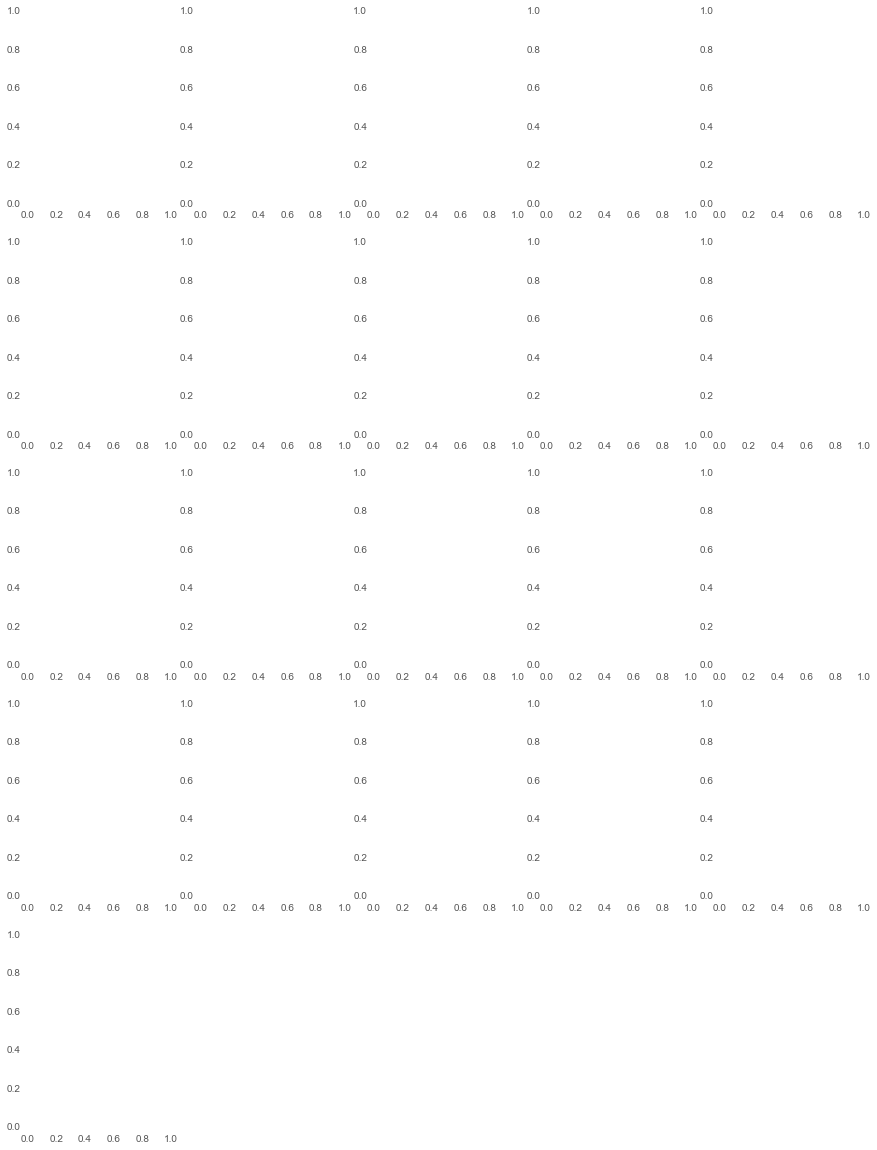

In [17]:
# Create a histogram to show the distribution in each variable

data.hist(alpha=0.5, bins=5, figsize=(15, 20))

In [8]:
# Create visualization plotting each field by price to determine which fields have instances with significant 
# differences in price

def visualize_all_fields_by_price(field):
    # Remove outliers for latitude and longitude
    if field == 'longitude':
        data[(data.longitude < -76.5) & (data.longitude > -78)].groupby('longitude')[['price']].mean().plot(figsize=(15, 2))
    elif field == 'latitude':
        data[(data.latitude > 38) & (data.latitude < 40)].groupby('latitude')[['price']].mean().plot(figsize=(15, 2))  
    
    # Avoid plotting price by price (itself)
    elif field == 'price': pass 
    
    # Text descriptions do not have categories to visualize
    elif field == 'description': pass
    elif field == 'url': pass
    
    else:
        data.groupby(field)[['price']].mean().plot(figsize=(15, 2))

c:\Users\alsherman\AppData\Local\Continuum\Anaconda\lib\site-packages\matplotlib\axes\_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=5005421838.0, right=5005421838.0
  'left=%s, right=%s') % (left, right))
c:\Users\alsherman\AppData\Local\Continuum\Anaconda\lib\site-packages\matplotlib\axes\_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
c:\Users\alsherman\AppData\Local\Continuum\Anaconda\lib\site-packages\matplotlib\axes\_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=39.118608, right=39.118608
  'left=%s, right=%s') % (left, right))
c:\Users\alsherman\AppData\Local\Continuum\Anaconda\lib\site-packages\matplotlib\axes\_base.py:2562: UserWarning: Attempting to set identical 

TypeError: Empty 'DataFrame': no numeric data to plot

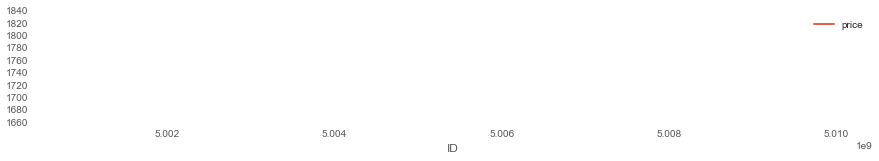

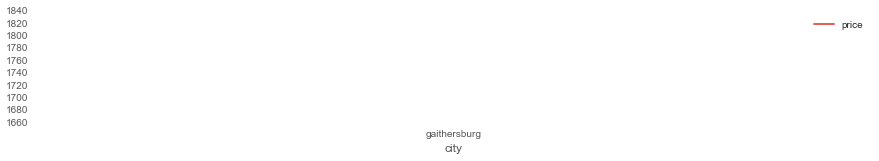

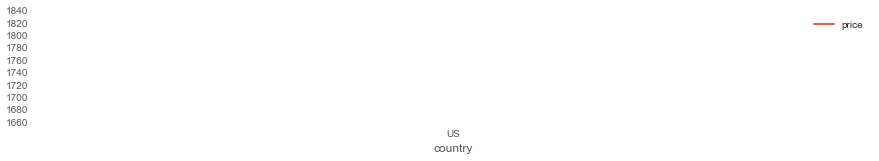

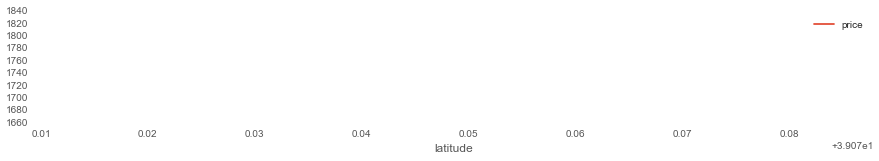

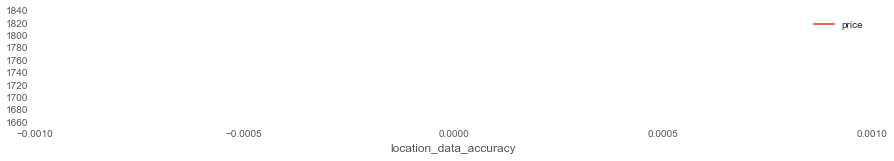

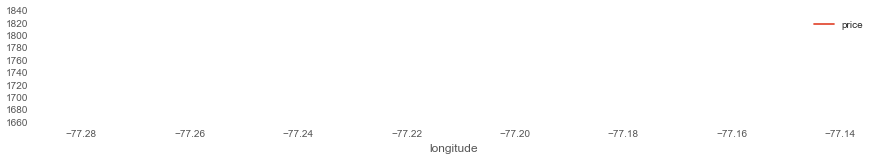

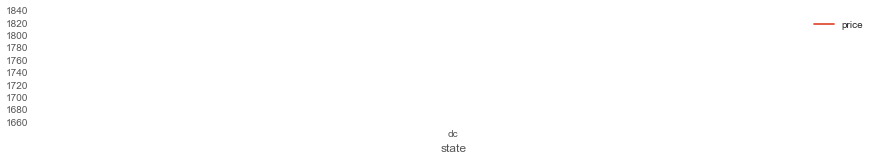

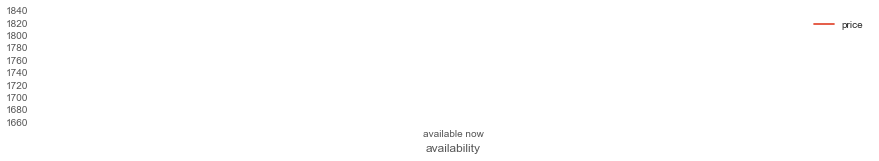

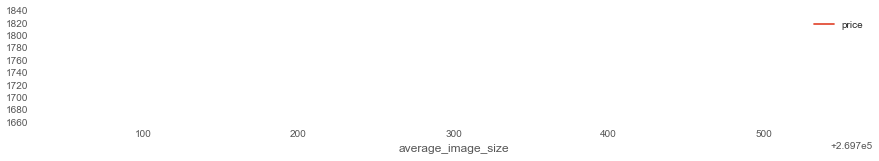

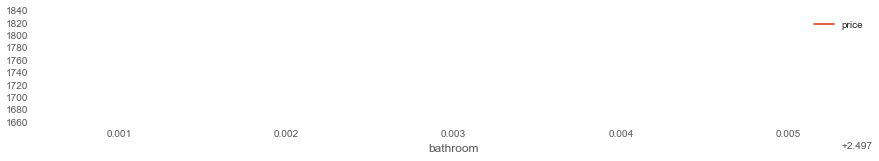

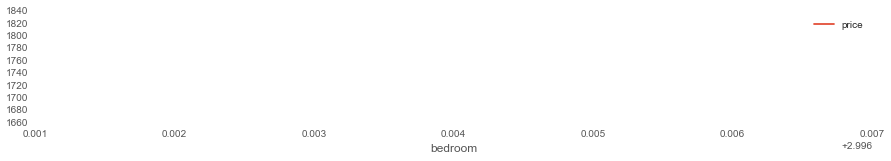

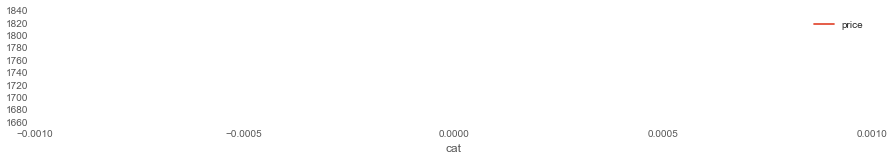

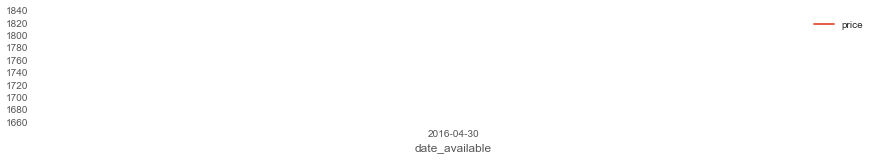

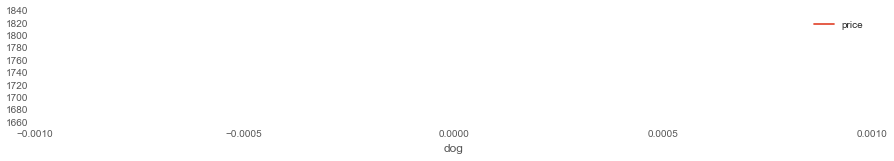

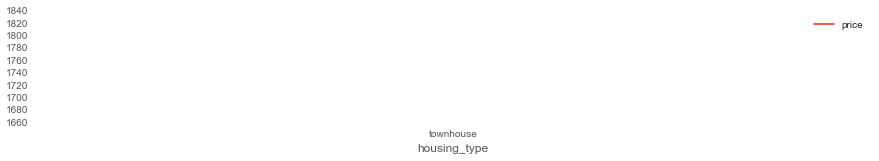

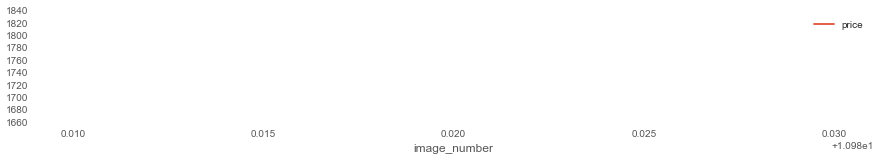

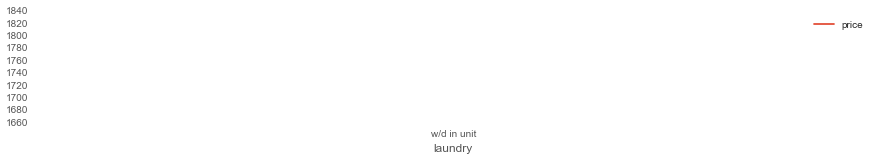

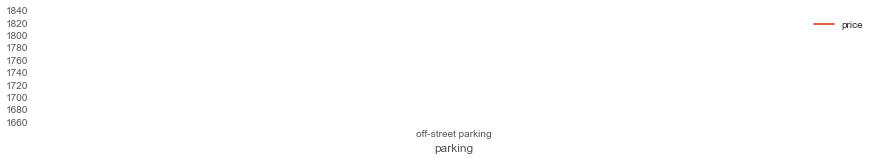

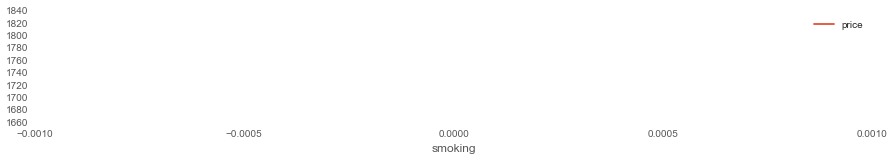

In [9]:
# View the visualizations from visualize_all_fields_by_price

for field in data.columns:
    visualize_all_fields_by_price(field)

ValueError: `dataset` input should have multiple elements.

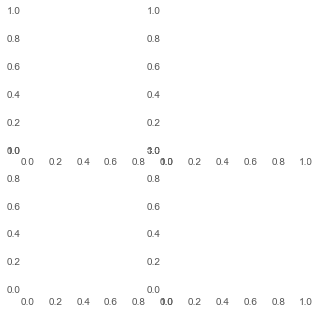

In [10]:
# Create a scatter matrix to view the correlation between Google Places API data for subways and train stations

scatter_matrix(data[[u'train_station_list',u'subway_station_list']], alpha=0.2, figsize=(5, 5), diagonal='kde')

In [11]:
# Drop train_station_list as it is correlated with subway_station_list

data.drop('train_station_list', axis=1, inplace=True)

In [12]:
data.to_csv(r'C:\Users\alsherman\Desktop\GitHub\DataScience_GeneralAssembly\Data\Cleaned_Data_May_18.csv')